In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [103]:
df = pd.read_csv("C:\\Users\\yasmi\\OneDrive\\Desktop\\hiring (1).csv")

In [104]:
df

,experience,test_score(outof10),interview_score(outof10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,600009
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [105]:
df.isnull().sum()

experience                  2
test_score(outof10)         1
interview_score(outof10)    0
salary($)                   0
dtype: int64

In [106]:
df.experience.value_counts()

experience
five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: count, dtype: int64

In [107]:
# treat missing values 

<Axes: xlabel='test_score(outof10)'>

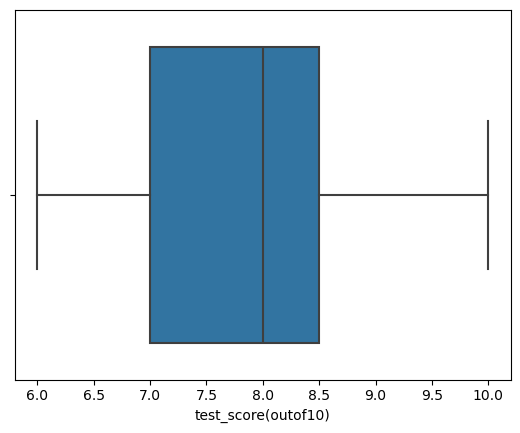

In [108]:
# Check outliers for column 'test_score(outof10)'

sns.boxplot(x = df['test_score(outof10)'])

In [109]:
test_score_mean = df['test_score(outof10)'].mean()

In [110]:
df['test_score(outof10)'].fillna(test_score_mean, inplace=True)

In [111]:
df.isnull().sum()

experience                  2
test_score(outof10)         0
interview_score(outof10)    0
salary($)                   0
dtype: int64

In [112]:
# computing the missing values of experience column 

In [113]:
mode_experience = df['experience'].mode()[0]
df['experience'].fillna(mode_experience, inplace=True)

In [114]:
df.isnull().sum()

experience                  0
test_score(outof10)         0
interview_score(outof10)    0
salary($)                   0
dtype: int64

In [115]:
df

,experience,test_score(outof10),interview_score(outof10),salary($)
0,eleven,8.000000,9,50000
1,eleven,8.000000,6,45000
2,five,6.000000,7,600009
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [116]:
# converting the categorical values of experience column to numeric values 

In [117]:
experience_mapping = {'two': 2, 'three': 3, 'five': 5, 'seven': 7, 'ten': 10, 'eleven': 11}

In [118]:
df['experience_encoded'] = df['experience'].map(experience_mapping)

In [119]:
df

,experience,test_score(outof10),interview_score(outof10),salary($),experience_encoded
0,eleven,8.000000,9,50000,11
1,eleven,8.000000,6,45000,11
2,five,6.000000,7,600009,5
3,two,10.000000,10,65000,2
4,seven,9.000000,6,70000,7
5,three,7.000000,10,62000,3
6,ten,7.857143,7,72000,10
7,eleven,7.000000,8,80000,11


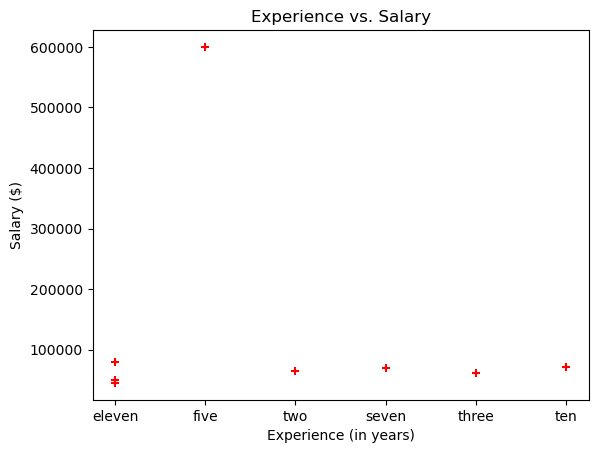

In [120]:
plt.xlabel('Experience (in years)')
plt.ylabel('Salary ($)')
plt.scatter(df['experience'], df['salary($)'], color='red', marker='+')
plt.title('Experience vs. Salary')
plt.show()

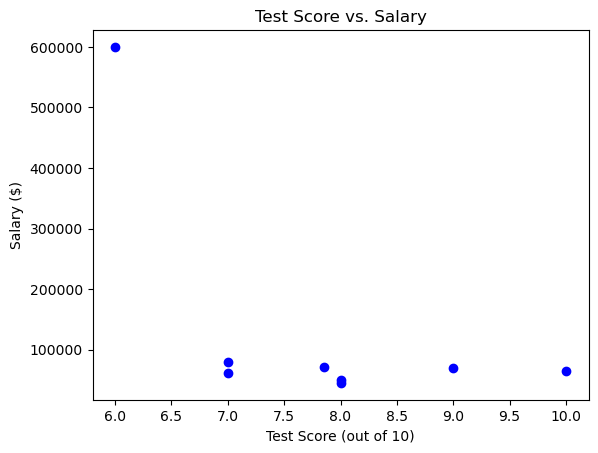

In [121]:
plt.xlabel('Test Score (out of 10)')
plt.ylabel('Salary ($)')
plt.scatter(df['test_score(outof10)'], df['salary($)'], color='blue', marker='o')
plt.title('Test Score vs. Salary')
plt.show()

In [122]:
df

,experience,test_score(outof10),interview_score(outof10),salary($),experience_encoded
0,eleven,8.000000,9,50000,11
1,eleven,8.000000,6,45000,11
2,five,6.000000,7,600009,5
3,two,10.000000,10,65000,2
4,seven,9.000000,6,70000,7
5,three,7.000000,10,62000,3
6,ten,7.857143,7,72000,10
7,eleven,7.000000,8,80000,11


In [123]:
df.drop(['experience'], axis=1, inplace=True)

In [124]:
X = df[['experience_encoded']].values  
y = df['salary($)'].values   

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

In [126]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.25,
                                                    random_state=42)

In [127]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [128]:
X_train , X_test, y_train, y_test

(array([[11],
        [11],
        [ 5],
        [ 7],
        [ 2],
        [10]], dtype=int64),
 array([[11],
        [ 3]], dtype=int64),
 array([ 50000,  80000, 600009,  70000,  65000,  72000], dtype=int64),
 array([45000, 62000], dtype=int64))

In [129]:
X_train = sm.add_constant(X_train)

In [130]:
model = sm.OLS(y_train, X_train).fit()

In [131]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                    0.5730
Date:                Wed, 27 Nov 2024   Prob (F-statistic):              0.491
Time:                        12:57:18   Log-Likelihood:                -81.309
No. Observations:                   6   AIC:                             166.6
Df Residuals:                       4   BIC:                             166.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.171e+05   2.32e+05      1.367      0.2

C:\Users\yasmi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
X_test = sm.add_constant(X_test)

In [134]:
y_pred = model.predict(X_test)

In [135]:
print("Predicted values for X_test:")
print(y_pred)

Predicted values for X_test:
[ 86183.48019802 254146.72772277]


In [136]:
mse = mean_squared_error(y_test, y_pred)

In [137]:
rmse = np.sqrt(mse)

In [138]:
mae = mean_absolute_error(y_test, y_pred)

In [139]:
print(f"MSE: {mse}") 
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 19308222007.89495
RMSE: 138954.02839750616
MAE: 116665.10396039611


In [140]:
# applying ridge and lasso regression 

In [141]:
# 3. Applying Ridge
from sklearn.model_selection import GridSearchCV

In [142]:
alphas = np.logspace(-2,2,5)

In [143]:
# Creating an instance to pass with param_grid in GridSearchCV
from sklearn import linear_model

In [144]:
ridge_estimator = linear_model.Ridge()

In [145]:
ridge_clf = GridSearchCV(ridge_estimator, param_grid=dict(alpha=alphas), cv=2)

In [146]:
ridge_clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [147]:
best_params = ridge_clf.best_params_

In [148]:
# Best parameters can also be found as follows:

ridge_clf.best_estimator_

Ridge(alpha=100.0)

In [149]:
best_score_ridge = ridge_clf.best_score_
best_score_ridge

-3008.0186795900386

In [150]:
ridge_clf_best_params = linear_model.Ridge(alpha=100.0)

In [151]:
ridge_clf_best_params.fit(X_train,y_train)

Ridge(alpha=100.0)

In [152]:
train_score_ridge_best_params = ridge_clf_best_params.score(X_train,y_train)

In [153]:
test_score_ridge_best_params = ridge_clf_best_params.score(X_test,y_test)

In [154]:
y_pred_ridge = ridge_clf_best_params.predict(X_test)

In [155]:
train_score_ridge_best_params

0.08054756225810944

In [156]:
test_score_ridge_best_params

-170.19353537632895

In [157]:
y_pred_ridge

array([128006.99800797, 195593.80278884])

In [158]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
lasso = Lasso(alpha=0.1)

In [160]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [161]:
y_pred = lasso.predict(X_test)

In [162]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [163]:
print("Lasso Coefficients:", lasso.coef_) 
print("Intercept:", lasso.intercept_) 
print("Mean Squared Error:", mse) 
print("R^2 Score:", r2)

Lasso Coefficients: [     0.        -20995.3970297]
Intercept: 317132.8772277227
Mean Squared Error: 19308215240.907955
R^2 Score: -266.2417334381724


In [164]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [165]:
#applying hyperparameter tuning with lasso

In [166]:
lasso = Lasso()

In [167]:
param_grid = { "alpha": [0.01, 0.1, 1, 10, 100] }

In [168]:
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring="r2")

In [169]:
grid_search.fit(X_train, y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [170]:
best_alpha = grid_search.best_params_["alpha"] 
best_score = grid_search.best_score_

In [171]:
best_alpha

0.01

In [172]:
best_score

nan

In [173]:
lasso_best = Lasso(alpha=best_alpha) 
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.01)

In [174]:
y_pred = lasso_best.predict(X_test)

In [175]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [176]:
print("Best Alpha:", best_alpha)
print("Best Cross-Validation R^2 Score:", best_score)
print("Test Set R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso_best.coef_)
print("Intercept:", lasso_best.intercept_)

Best Alpha: 0.01
Best Cross-Validation R^2 Score: nan
Test Set R^2 Score: -266.2418177328182
Mean Squared Error: 19308221331.196117
Lasso Coefficients: [     0.        -20995.4050495]
Intercept: 317132.9387128713


In [177]:
#Applying KNN regressor

from sklearn import neighbors
from math import sqrt

In [178]:
# Saving an KNN instance with default parameters

knn = neighbors.KNeighborsRegressor()

In [179]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [180]:
y_pred_knn = knn.predict(X_test)

In [181]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_knn))

print('MSE: ',metrics.mean_squared_error(y_test, y_pred_knn))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

MAE:  122401.79999999999
MSE:  15031200643.239998
RMSE: 122601.7970636646


In [182]:
# Accuracy score

knn.score(X_test,y_test)

-207.0442995604152

In [183]:
knn.score(X_train,y_train)

-0.00048782338497632693

In [184]:
# KNN regressor with hyperparameter tuning 

In [185]:
# Checking with KNN hyperparameter tuning

# Saving the possible options of parameter to pass in the model in 'param_grid'

import numpy as np

param_grid = {'n_neighbors' : np.arange(3,10)}

In [186]:
# Saving the instance of the class

from sklearn.neighbors import KNeighborsRegressor

knn_hpt = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV

knn_cv = GridSearchCV(knn_hpt,param_grid, cv=6)

# Passing the set of parameters in 'param_grid' as defined in GridSearchCV to compare the cross validated scores.

In [187]:
knn_cv.fit(X_train,y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

GridSearchCV(cv=6, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])})

In [188]:
neighbors = range(1, 6)

# Setting up arrays to store train and test accuracies for different values of K.

train_accuracy_knn_cv = np.empty(len(neighbors))
test_accuracy_knn_cv = np.empty(len(neighbors))

In [189]:
# Generating a for loop with the list of neighbours to do the train data fit for each of the K values and find out their
# train and test accuracies.

for i,k in enumerate(neighbors):   
    
    # Enumerate: We are using a loop to iterate over different values of k for the number of neighbours in a K nearest Neighbors 
    # classifier.
    
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of k and evaluating
    # it's performance.
    
    knn.fit(X_train, y_train)
    
    
    train_accuracy_knn_cv[i] = knn.score(X_train, y_train)
    
   
    test_accuracy_knn_cv[i] = knn.score(X_test, y_test)

In [190]:
train_accuracy_knn_cv[i]

-0.00048782338497632693

In [191]:
test_accuracy_knn_cv[i]

-207.0442995604152

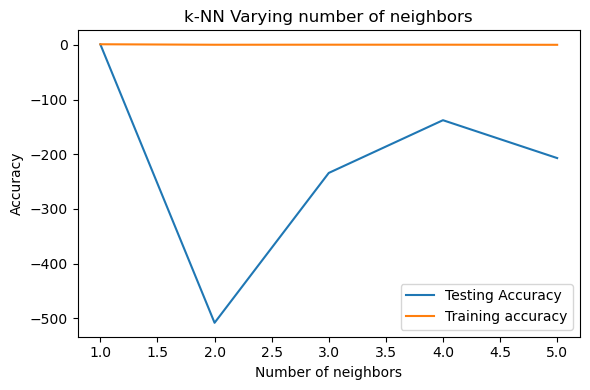

In [192]:
# Checking for the stable train and test accuracy scores with the help of plot


plt.figure(figsize=(6,4))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy_knn_cv, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy_knn_cv, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [193]:
knn4 = KNeighborsRegressor(n_neighbors=4)

In [194]:
knn4.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [195]:
train_accuracy_knn4 = knn4.score(X_train, y_train)
    
test_accuracy_knn4 = knn4.score(X_test, y_test)

In [196]:
train_accuracy_knn4

0.18029820555600684

In [197]:
test_accuracy_knn4 

-137.82139363365053

In [198]:
# the score are not suitable for knn model

In [199]:
# apply svr 

In [201]:
# Applying SVM (SVR)

from sklearn import svm

In [203]:
# First, let's choose which kernel is the best for our data

In [205]:
for k in ['linear','poly','rbf','sigmoid']:     
    clf = svm.SVR(kernel=k)     
    clf.fit(X_train, y_train)          
    confidence = clf.score(X_train, y_train)     
    print(k,confidence)

linear -0.18381524375382896
poly -0.18377441406239914
rbf -0.18372446751199845
sigmoid -0.18372184239978706


In [207]:
# Rbf and Poly kurnels give the best accuracy score hense we will apply those kurnel to train the data seperatly 

In [209]:
# Applying parameter tuning with rbf to check if accuracy score can be further maximized or not.

from sklearn.svm import SVR

In [211]:
svr = SVR(kernel='rbf', C=1, gamma= 0.5)

In [213]:
# Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ 
# and high values meaning ‘close’.
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.

# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training 
# points correctly. 
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 

# In other words C behaves as a regularization parameter in the SVM

In [215]:
svr.fit(X_train,y_train)

SVR(C=1, gamma=0.5)

In [217]:
print(svr.score(X_train,y_train))

-0.18371852380550635


In [219]:
print(svr.score(X_test,y_test))

-4.238880958074958


In [221]:
y_pred_rbf = svr.predict(X_test)

In [223]:
from sklearn import metrics

In [225]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_rbf))

print('MSE: ',metrics.mean_squared_error(y_test, y_pred_rbf))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

MAE:  17499.999664545867
MSE:  378509149.22091573
RMSE: 19455.31159403302


In [227]:
svp = SVR(kernel='poly', C=1, degree= 2)

In [229]:
svp.fit(X_train,y_train)

SVR(C=1, degree=2, kernel='poly')

In [231]:
print(svp.score(X_train,y_train))

-0.18373649193532904


In [233]:
print(svp.score(X_test,y_test))

-4.239308751468236


In [235]:
y_pred_poly = svp.predict(X_test)

In [237]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_poly))

print('MSE: ',metrics.mean_squared_error(y_test, y_pred_poly))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

MAE:  17499.3723909373
MSE:  378540057.29358006
RMSE: 19456.105912889663


In [239]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error

In [241]:
param_grid = [ {'kernel': ['linear'], 'C': [0.1, 1, 10]}, 
               {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}, 
               {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': [0.01, 0.1, 1]} ]

In [243]:
grid_search = GridSearchCV( estimator=SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1 )

In [245]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['poly']}],
             scoring='neg_mean_squared_error', verbose=2)

In [246]:
best_params = grid_search.best_params_ 
best_model = grid_search.best_estimator_

In [247]:
print("Best parameters found:", best_params)

Best parameters found: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [248]:
y_train_pred = best_model.predict(X_train) 
mse = mean_squared_error(y_train, y_train_pred) 
print(f"Mean Squared Error on training data: {mse:.4f}")

Mean Squared Error on training data: 46735069742.1405


In [249]:
# apply decision tree regressor 

In [250]:
from sklearn.tree import DecisionTreeRegressor

In [251]:
minDepth = 100

minRMSE = 100000

In [252]:
# Hyperparameter tuning for Decision Tree Regressor:

for depth in range(2, 15):
    dt_reg = DecisionTreeRegressor(max_depth = depth)
    dt_reg.fit(X_train,y_train)
    y_pred_dt_reg = dt_reg.predict(X_test)
    mse_dt = mean_squared_error(y_test,y_pred_dt_reg)
    rmse_dt = np.sqrt(mse_dt)
    print('Depth:', depth, ', MSE:', mse_dt, ', RMSE:', rmse_dt)
    
    if rmse_dt < minRMSE:
        minRMSE = rmse_dt
        minDepth = depth  
# Depth: 13 , MSE: 0.055, RMSE: 0.23 is the most optimal depth for the decision tree.

Depth: 2 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 3 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 4 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 5 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 6 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 7 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 8 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 9 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 10 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 11 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 12 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 13 , MSE: 204500000.0 , RMSE: 14300.349646075092
Depth: 14 , MSE: 204500000.0 , RMSE: 14300.349646075092


In [253]:
print('minDepth:',minDepth)
print('minRMSE:', minRMSE)

minDepth: 2
minRMSE: 14300.349646075092


In [254]:
# Saving an instance with tuned parameters (in this case with mindepth=13)

dt_tuned = DecisionTreeRegressor(max_depth = minDepth)

In [255]:
dt_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [256]:
dt_tuned_train_score = dt_tuned.score(X_train,y_train)

In [257]:
dt_tuned_test_score = dt_tuned.score(X_test,y_test)

In [263]:
dt_tuned_train_score ,dt_tuned_test_score

# Accuracy score is: 67%, Overfitting is there.

(0.998091931922245, -1.8304498269896192)

In [272]:
y_pred_dt_tuned = dt_tuned.predict(X_test)

In [273]:
# Checking with default parameters for Decision Tree

dt_default = DecisionTreeRegressor()

In [275]:
dt_default.fit(X_train,y_train)

DecisionTreeRegressor()

In [276]:
dt_default_train_score = dt_tuned.score(X_train,y_train)

In [279]:
dt_default_test_score = dt_tuned.score(X_test,y_test)

In [283]:
dt_default_train_score, dt_default_test_score

# There is gross overfitting scenario even with default parameters for Decision Tree, hence trying with Random Forest.

(0.998091931922245, -1.8304498269896192)

In [285]:
# random forest regressor

In [287]:
from sklearn.ensemble import RandomForestRegressor

In [288]:
rf_reg = RandomForestRegressor()

In [291]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [293]:
rf_reg_train_score = rf_reg.score(X_train,y_train)

In [295]:
rf_reg_test_score = rf_reg.score(X_test,y_test)

In [297]:
rf_reg_train_score, rf_reg_test_score

(0.6946556765945413, -105.35007883341524)

In [299]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_pred_rf_reg

array([ 70845.09, 183241.98])

In [301]:
# Trying with RF hyperparameter tuning without cross validation

In [303]:
rf_reg_ht = RandomForestRegressor(n_estimators=50, random_state=91)

In [305]:
rf_reg_ht.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=91)

In [307]:
rf_reg_ht_train_score = rf_reg_ht.score(X_train,y_train)

In [309]:
rf_reg_ht_test_score = rf_reg_ht.score(X_test,y_test)

In [311]:
rf_reg_ht_train_score , rf_reg_ht_test_score

(0.7686426901424304, -69.86060298009964)

In [313]:
# without cross validation not that much difference 

In [315]:
# Trying with RF hyperparameter tuning with cross validation

param_grid = {
'max_depth': [2,3,4,5],
 # 'min_samples_split': [2],
 # 'min_samples_leaf': [1, 2],
 # 'max_features': ['auto', 'sqrt'],
 #'criterion': ['absolute_error'],
 'n_estimators': [10,15]
}

In [317]:
# Create a GridSearchCV object with cross-validation

from sklearn.model_selection import GridSearchCV

grid_search_rf_reg_ht1 = GridSearchCV(rf_reg_ht, param_grid, cv=5, scoring='r2')

# Instead of neg_mean_squared_error, we can mention 'mean_squared_error' as 'scoring'

In [319]:
# Fit the model to the data

grid_search_rf_reg_ht1.fit(X_train, y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=50, random_state=91),
             param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 15]},
             scoring='r2')

In [320]:
# Get the best parameters

print("Best parameters: ", grid_search_rf_reg_ht1.best_params_)

Best parameters:  {'max_depth': 2, 'n_estimators': 10}


In [321]:
# Get the best score from the tuned parameters

print("Best score: ", grid_search_rf_reg_ht1.best_score_)

Best score:  nan


In [322]:
grid_search_rf_reg_ht1_train_score = grid_search_rf_reg_ht1.score(X_train,y_train)

In [327]:
grid_search_rf_reg_ht1_train_score

0.6885612127710251

In [329]:
grid_search_rf_reg_ht1_test_score

NameError: name 'grid_search_rf_reg_ht1_test_score' is not defined

In [331]:
# trying with another set of param grid to cross compare accuracy scores without overfiting 

In [333]:
# Trying with RF hyperparameter tuning with cross validation

param_grid1 = {
'max_depth': [2,3,6,7,9],
 # 'min_samples_split': [2],
 # 'min_samples_leaf': [1, 2],
 # 'max_features': ['auto', 'sqrt'],
 #'criterion': ['absolute_error'],
 'n_estimators': [4,5,6,7,9,10,12,13,15,17,19,20]
}

In [335]:
# Create a GridSearchCV object with cross-validation

from sklearn.model_selection import GridSearchCV

grid_search_rf_reg_ht2 = GridSearchCV(rf_reg_ht, param_grid1, cv=8, scoring='r2')

# Instead of neg_mean_squared_error, we can mention 'mean_squared_error' as 'scoring'

In [337]:
# Fit the model to the data

grid_search_rf_reg_ht2.fit(X_train, y_train)

ValueError: Cannot have number of splits n_splits=8 greater than the number of samples: n_samples=6.

In [ ]:
# Get the best parameters

print("Best parameters: ", grid_search_rf_reg_ht2.best_params_)

In [340]:
# Get the best score from the tuned parameters

print("Best score: ", grid_search_rf_reg_ht2.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [342]:
grid_search_rf_reg_ht2_train_score = grid_search_rf_reg_ht2.score(X_train,y_train)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [344]:
grid_search_rf_reg_ht2_test_score = grid_search_rf_reg_ht2.score(X_test,y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [346]:
grid_search_rf_reg_ht2_train_score , grid_search_rf_reg_ht2_test_score

NameError: name 'grid_search_rf_reg_ht2_train_score' is not defined

In [348]:
# till now KNN15 gives the best accuracy score without much overfitting , we will apply boosting model to cross compare accuracy scores 

In [350]:
# Ada Boost
# Applying with default parameters

from sklearn.ensemble import AdaBoostRegressor

In [352]:
ada_reg = AdaBoostRegressor()

In [354]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [356]:
train_score_ada_reg = ada_reg.score(X_train,y_train)

In [358]:
test_score_ada_reg = ada_reg.score(X_test,y_test)

In [360]:
train_score_ada_reg , test_score_ada_reg

(0.9980834891431399, -1.8304498269896192)

In [362]:
y_pred_ada_reg = ada_reg.predict(X_test)

In [364]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_ada_reg))

MSE:  204500000.0


In [366]:
# Applying hyperparameter tuning for Ada Boost

ada_tuned_reg = AdaBoostRegressor()

In [371]:
param_grid = {
    'n_estimators' : [2,3,4,5,7,9],
    'learning_rate' : [0.01, 0.1]
    #'loss': ['exponential', 'linear', 'square']
}

In [373]:
grid_search_tuned_ada = GridSearchCV(estimator=ada_tuned_reg, param_grid = param_grid, cv=5, scoring='r2')

In [375]:
grid_search_tuned_ada.fit(X_train,y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [2, 3, 4, 5, 7, 9]},
             scoring='r2')

In [377]:
grid_search_tuned_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 2}

In [379]:
grid_search_tuned_ada.best_score_

nan

In [381]:
y_pred_grid_search_tuned_ada = grid_search_tuned_ada.predict(X_test)

In [394]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_ada))

MSE:  617000000.0


In [396]:
ada_tuned_reg_best_params = AdaBoostRegressor(learning_rate= 0.1, loss= 'square', n_estimators= 9)

# Application of best params
# train & tets score
# y_pred
# mse

In [398]:
ada_tuned_reg_best_params.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=9)

In [400]:
train_score_ada_reg_best_params = ada_tuned_reg_best_params.score(X_train,y_train)

In [402]:
test_score_ada_reg_best_params = ada_tuned_reg_best_params.score(X_test,y_test)

In [404]:
train_score_ada_reg_best_params, test_score_ada_reg_best_params

(0.9959770157564148, -8.16955017301038)

In [406]:
y_pred_ada_reg_best_params = ada_tuned_reg_best_params.predict(X_test)

In [408]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_ada_reg_best_params))

MSE:  662500000.0


In [410]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gradient_reg = GradientBoostingRegressor()

In [412]:
gradient_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [414]:
train_score_gradient_reg = gradient_reg.score(X_train,y_train)

In [416]:
test_score_gradient_reg = gradient_reg.score(X_test,y_test)

In [426]:
train_score_gradient_reg, test_score_gradient_reg

(0.9981003739971824, -1.8312207834859486)

In [428]:
y_pred_gradient_reg = gradient_reg.predict(X_test)

In [430]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_gradient_reg))

MSE:  204555701.6068598


In [432]:
# Hyperparameter tuning on Gradient boosting

gradient_tuned_reg = GradientBoostingRegressor()

In [434]:
param_grid = {
    'n_estimators' : [5,7,9],
    'learning_rate' : [0.01, 0.1],
    'max_depth': [5,7,11],
    'loss': ['squared_error','absolute_error']
}

In [436]:
grid_search_tuned_gradient = GridSearchCV(estimator=gradient_tuned_reg, param_grid = param_grid, cv=5, scoring='r2')

In [438]:
grid_search_tuned_gradient.fit(X_train,y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 11], 'n_estimators': [5, 7, 9]},
             scoring='r2')

In [440]:
grid_search_tuned_gradient.best_params_

{'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 5,
 'n_estimators': 5}

In [442]:
grid_search_tuned_gradient.best_score_

nan

In [450]:
y_pred_grid_search_tuned_gradient = grid_search_tuned_gradient.predict(X_test)

In [452]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_gradient))

MSE:  9715493803.801891


In [454]:
gradient_tuned_reg_best_params = GradientBoostingRegressor(learning_rate= 0.1, loss='squared_error',max_depth=11, n_estimators=9)

In [456]:
gradient_tuned_reg_best_params.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=11, n_estimators=9)

In [458]:
train_score_gradient_reg_best_params = gradient_tuned_reg_best_params.score(X_train,y_train)

In [467]:
test_score_gradient_reg_best_params = gradient_tuned_reg_best_params.score(X_test,y_test)

In [469]:
train_score_gradient_reg_best_params, test_score_gradient_reg_best_params

(0.8482908629707528, -30.34119484252896)

In [471]:
y_pred_gradient_reg_best_params = gradient_tuned_reg_best_params.predict(X_test)

In [473]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_gradient_reg_best_params))

MSE:  2264401327.3727174


In [475]:
# Applying XG Boost Regressor

# Default parameters for XG Boost

# !pip install xgboost

# from sklearn.ensemble import xgBoost

from xgboost import XGBRegressor

In [477]:
xgb_reg = XGBRegressor()

In [487]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [489]:
train_score_xgb_reg = xgb_reg.score(X_train,y_train)

In [491]:
test_score_xgb_reg = xgb_reg.score(X_test,y_test)

In [499]:
train_score_xgb_reg, test_score_xgb_reg

(0.998100374701196, -1.8304524762124452)

In [501]:
y_pred_xgb_reg = xgb_reg.predict(X_test)

In [503]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_xgb_reg))

MSE:  204500191.40634918


In [505]:
# Hyperparameter tuning for XG Boost

xgb_tuned_reg = XGBRegressor()

In [507]:
param_grid = {
    'n_estimators': [2,5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 4],
    'reg_alpha': [0, 1, 4],
    'objective': ['reg:squarederror'], 
    'eval_metric': ['rmse'] 
}

In [509]:
from sklearn.model_selection import RandomizedSearchCV

In [511]:
xgb_tuned_reg = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid_search_tuned_xgb = RandomizedSearchCV(
    estimator=xgb_tuned_reg, 
    param_distributions=param_grid,  # Use RandomizedSearchCV for speed
    n_iter=3,
    cv=2, 
    scoring='r2',
    random_state=42
)

In [516]:
grid_search_tuned_xgb.fit(X_train, y_train, 
                          eval_set=[(X_train, y_train)], 
                          verbose=0)

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rat...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=3,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'eval_metric': ['rmse'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [2, 5, 10],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0, 1, 4],
                                        'reg_lambda': [0, 1, 4],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [518]:
from xgboost import XGBRegressor

param_dist = {
    'n_estimators': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 4],
    'reg_alpha': [0, 1, 4]}

xgb_tuned_reg = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

random_search_tuned_xgb = RandomizedSearchCV(
    estimator=xgb_tuned_reg, 
    param_distributions=param_dist, 
    n_iter=3,
    cv=3, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1  # Using all available CPU cores
)

random_search_tuned_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)], 
    verbose=0
)

print("Best parameters found: ", random_search_tuned_xgb.best_params_)
print("Best R2 score: ", random_search_tuned_xgb.best_score_)

Best parameters found:  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 4, 'n_estimators': 20, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.5, 'colsample_bytree': 1.0}
Best R2 score:  -498.60052528565006


In [520]:
grid_search_tuned_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 4,
 'objective': 'reg:squarederror',
 'n_estimators': 2,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'eval_metric': 'rmse',
 'colsample_bytree': 1.0}

In [522]:
grid_search_tuned_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [526]:
grid_search_tuned_xgb.best_score_

-2125.8306807535955

In [528]:
y_pred_grid_search_tuned_xgb = grid_search_tuned_xgb.predict(X_test)

In [530]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_xgb))

MSE:  9454721947.32434


In [536]:
xgb_tuned_reg_best_params = XGBRegressor(colsample_bytree=1.0,eval_metric='rmse',learning_rate=0.1,max_depth=7,min_child_weight=3,
                                      n_estimators=7,objective='reg:squarederror',reg_alpha=0,reg_lambda=1,subsample=0.8)

In [539]:
xgb_tuned_reg_best_params.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=7, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [541]:
train_score_xgb_reg_best_params = xgb_tuned_reg_best_params.score(X_train,y_train)

In [543]:
test_score_xgb_reg_best_params = xgb_tuned_reg_best_params.score(X_test,y_test)

In [548]:
train_score_xgb_reg_best_params, test_score_xgb_reg_best_params

(0.0740424400573646, -160.84745701749702)

In [550]:
y_pred_xgb_reg_best_params = xgb_tuned_reg_best_params.predict(X_test)

In [552]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_xgb_reg_best_params))

MSE:  11693478769.51416
